# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [1]:
import os
import sys
import glob
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(source_dir='./data/final_project'):
    
    configs = []
    learning_curves = []
    
    for fn in glob.glob(os.path.join(source_dir, "*.json")):
        with open(fn, 'r') as fh:
            tmp = json.load(fh)
            configs.append(tmp['config'])
            learning_curves.append(tmp['learning_curve'])
    return(configs, learning_curves)
configs, learning_curves = load_data()

In [3]:
N = len(configs)
n_epochs = len(learning_curves[0])

configs_df = pd.DataFrame(configs)
learning_curves = np.array(learning_curves)

In [4]:
configs_df

,batch_size,log10_learning_rate,log2_n_units_1,log2_n_units_2,log2_n_units_3
0,509.705004,-2.419720,4.978802,8.276063,9.674919
1,152.494228,-3.088434,4.070143,4.950489,5.921202
2,80.858326,-3.292825,6.928323,9.708751,7.660000
3,58.005117,-5.982527,7.130199,6.064660,7.905815
4,179.642937,-1.646347,6.369004,9.340144,5.881575
5,71.480103,-3.981153,4.022102,9.113058,6.505324
6,481.914628,-2.219576,5.461903,6.713298,9.153099
7,45.329305,-4.100025,6.010338,5.822146,7.644984
8,459.036978,-0.401031,7.294442,7.277784,9.755888
9,324.975231,-3.186430,8.377195,9.669352,6.297482


## Sample learning curves

In [6]:
learning_curves[:20]

array([[ 0.66415055,  0.52931444,  0.48991831,  0.43935478,  0.36097611,
         0.33936512,  0.29810775,  0.27535932,  0.28683693,  0.25405853,
         0.27587633,  0.24640678,  0.22831144,  0.23068969,  0.2201427 ,
         0.22231413,  0.23244752,  0.20680385,  0.20204736,  0.1991521 ,
         0.193465  ,  0.17443904,  0.17474925,  0.17547307,  0.172371  ,
         0.17278462,  0.17371523,  0.1720608 ,  0.17371523,  0.17247441,
         0.17412884,  0.17278461,  0.17268121,  0.17319822,  0.17247441,
         0.17319822,  0.17412884,  0.17257781,  0.17278461,  0.17309483],
       [ 0.41842105,  0.41740891,  0.35404858,  0.33309716,  0.32449393,
         0.3104251 ,  0.30789474,  0.29352227,  0.28076923,  0.27044535,
         0.28319838,  0.29240891,  0.27580971,  0.30334008,  0.27368421,
         0.27621457,  0.29362348,  0.32236842,  0.28380567,  0.27763158,
         0.28653846,  0.28036437,  0.28765182,  0.32267207,  0.28016194,
         0.31700405,  0.28026316,  0.29008097,  0.

In [7]:
learning_curves

array([[ 0.66415055,  0.52931444,  0.48991831, ...,  0.17257781,
         0.17278461,  0.17309483],
       [ 0.41842105,  0.41740891,  0.35404858, ...,  0.29251012,
         0.29868421,  0.28765182],
       [ 0.3415    ,  0.2793    ,  0.2673    , ...,  0.1874    ,
         0.1825    ,  0.1696    ],
       ..., 
       [ 0.3773281 ,  0.31702406,  0.29578174, ...,  0.2299406 ,
         0.20799356,  0.18614719],
       [ 0.89905815,  0.86875512,  0.83230958, ...,  0.56797707,
         0.56490582,  0.56480344],
       [ 0.48057669,  0.36123348,  0.37535042, ...,  0.1510813 ,
         0.15178215,  0.1515819 ]])

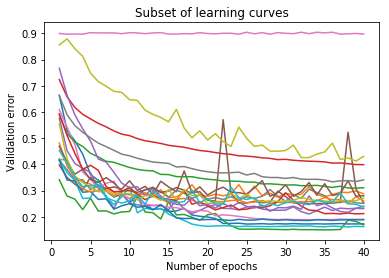

In [10]:
n_subset=20
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

## Basic Data Exploration

### Histogram and CDF over the final error rate

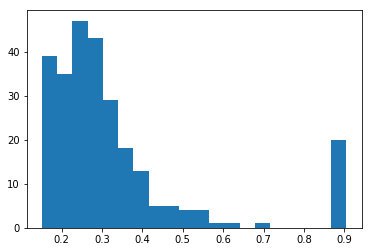

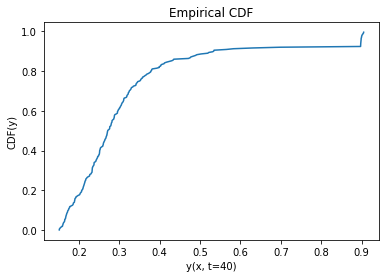

265
[ 0.          0.00377358  0.00754717  0.01132075  0.01509434  0.01886792
  0.02264151  0.02641509  0.03018868  0.03396226  0.03773585  0.04150943
  0.04528302  0.0490566   0.05283019  0.05660377  0.06037736  0.06415094
  0.06792453  0.07169811  0.0754717   0.07924528  0.08301887  0.08679245
  0.09056604  0.09433962  0.09811321  0.10188679  0.10566038  0.10943396
  0.11320755  0.11698113  0.12075472  0.1245283   0.12830189  0.13207547
  0.13584906  0.13962264  0.14339623  0.14716981  0.1509434   0.15471698
  0.15849057  0.16226415  0.16603774  0.16981132  0.17358491  0.17735849
  0.18113208  0.18490566  0.18867925  0.19245283  0.19622642  0.2
  0.20377358  0.20754717  0.21132075  0.21509434  0.21886792  0.22264151
  0.22641509  0.23018868  0.23396226  0.23773585  0.24150943  0.24528302
  0.2490566   0.25283019  0.25660377  0.26037736  0.26415094  0.26792453
  0.27169811  0.2754717   0.27924528  0.28301887  0.28679245  0.29056604
  0.29433962  0.29811321  0.30188679  0.30566038  0.30

In [11]:
sorted = np.sort(learning_curves[:, -1])
h = plt.hist(sorted, bins=20)
plt.show()

#print(sorted)

yvals = np.arange(len(sorted))/float(len(sorted))
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

print(len(sorted))
float((len(sorted)))
print(yvals)

### Histogram and CDF over all error rates

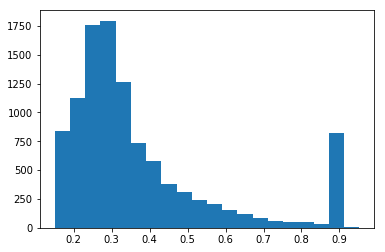

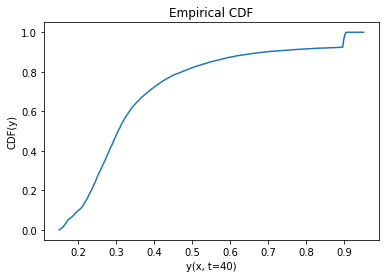

In [16]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
from torch.autograd import Variable

In [2]:
# Hyperparameters

input_size = 5 # 5 features
hidden_size = 64
output_size = 1 # 
num_epochs = 50
batch_size = 100
learning_rate = 0.001

In [3]:
# Neural Network Model (2 hidden layers MLP)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

mlp = MLP(input_size, hidden_size, output_size)

# Loss and Optimer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

#Train the model

In [ ]:
#train_input
#
#
#
#
# pre-process training input and labels
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_input):
        # Convert torch tensor to Variable
        inputs = Variable(inputs)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad() # zero the gradient
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0
        print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(n_epochs), loss.data[0])


# 